# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
Penetración_Internet_fijo_cada_100_hogares = pd.read_csv('datos/Penetración de Internet fijo (accesos por cada 100 hogares).csv')
Penetración_por_hogares_nacional_de_Internet_fijo = pd.read_csv('datos/Penetración por hogares nacional de Internet fijo.csv')
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta = pd.read_csv('datos/Total nacional de accesos a Internet fijo por banda ancha y banda angosta.csv')
Accesos_a_banda_ancha_y_banda_angosta_por_provincia = pd.read_csv('datos/Accesos a banda ancha y banda angosta por provincia.csv')
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología = pd.read_csv('datos/Serie trimestral de accesos a Internet fijo por tecnología.csv')
Acceso_a_Internet_fijo_por_tecnología_y_provincia = pd.read_csv('datos/Acceso a Internet fijo por tecnología y provincia.csv')
Velocidad_Media_de_bajada_de_Internet_fijo = pd.read_csv('datos/Velocidad Media de bajada de Internet fijo.csv')
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia = pd.read_csv('datos/Velocidad media de bajada de Internet fijo por provincia.csv')
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad = pd.read_csv('datos/Distribución de los accesos totales nacionales a Internet fijo por velocidad.csv')
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia = pd.read_csv('datos/Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv')
Accesos_a_Internet_fijo_por_velocidad_bajada_y_provincia = pd.read_csv('datos/Accesos a Internet fijo por velocidad bajada y provincia.csv')
Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo = pd.read_csv('datos/Ingresos trimestrales por la prestación del servicio de Internet fijo.csv')
Accesos_a_Internet_fijo_por_velocidad_de_bajada_y_localidad = pd.read_csv('datos/Accesos a Internet fijo por velocidad de bajada y localidad.csv')
Accesos_a_Internet_fijo_por_tecnología_y_localidad = pd.read_csv('datos/Accesos a Internet fijo por tecnología y localidad.csv')
Listado_de_localidades_con_conectividad_a_internet = pd.read_csv('datos/Listado de localidades con conectividad a internet.csv')


Análisis del primer dataset obtenido - Penetración_Internet_fijo_cada_100_hogares

In [3]:
# Vista global
Penetración_Internet_fijo_cada_100_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


In [4]:
# Chequeo del tipo de datos 
Penetración_Internet_fijo_cada_100_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [5]:
# Reemplazo de ',' por '.' y 'object' por 'float'
Penetración_Internet_fijo_cada_100_hogares['Accesos por cada 100 hogares']=Penetración_Internet_fijo_cada_100_hogares['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)

# Chequeo de los cambios realizados anteriormente
Penetración_Internet_fijo_cada_100_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38
...,...,...,...,...
835,2014,1,Santa Cruz,28.94
836,2014,1,Santa Fe,47.85
837,2014,1,Santiago Del Estero,16.31
838,2014,1,Tierra Del Fuego,63.97


In [6]:
# Chequeo de los cambios realizados anteriormente
Penetración_Internet_fijo_cada_100_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [7]:
# Chequeo de ratios para chequear consistencia de los datos
Penetración_Internet_fijo_cada_100_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


Se puede ver que la media ronda los 49 hogares cada 100, osea casi la mitad. Tambien un máximo de 124, lo que puede indicar posibles outliers

Text(0.5, 1.0, 'Histograma de Penetración de Internet')

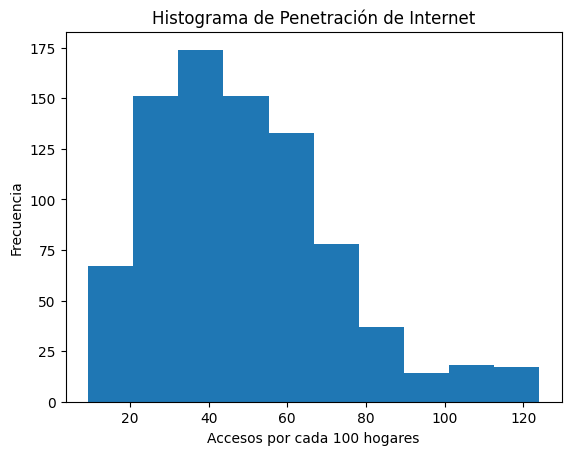

In [8]:
# Chequeo de la distribución a través de un histograma
plt.hist(Penetración_Internet_fijo_cada_100_hogares['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.title('Histograma de Penetración de Internet')


Text(0.5, 1.0, 'Boxplot de Penetración de Internet')

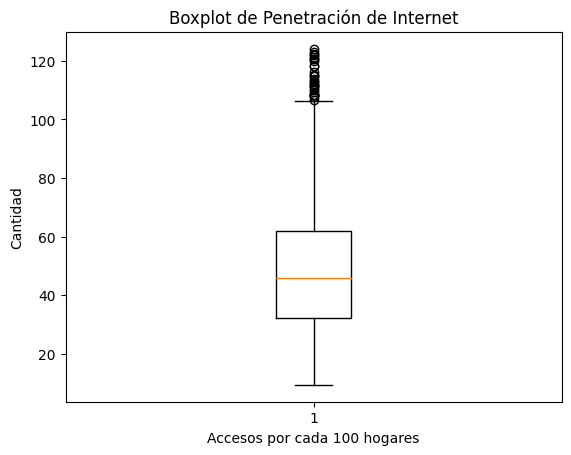

In [9]:
# Chequeo de los posibles outliers 
plt.boxplot(Penetración_Internet_fijo_cada_100_hogares['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Cantidad')
plt.title('Boxplot de Penetración de Internet')

Se obervan outliers

In [10]:
# Agrupación de los datos por provincia
Penetración_Internet_fijo_cada_100_hogares_agrupado = Penetración_Internet_fijo_cada_100_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

In [11]:
# Creación de dataframe
Penetración_Internet_fijo_cada_100_hogares_agrupado = pd.DataFrame(Penetración_Internet_fijo_cada_100_hogares_agrupado)

# Orden del DataFrame por la columna "Accesos por cada 100 hogares" de menor a mayor
Penetración_Internet_fijo_cada_100_hogares_agrupado = Penetración_Internet_fijo_cada_100_hogares_agrupado.sort_values(by='Accesos por cada 100 hogares', ascending=True)

# Seleccion de los primeros 10 valores del DataFrame ordenado
Penetración_Internet_fijo_cada_100_hogares_agrupado = Penetración_Internet_fijo_cada_100_hogares_agrupado.head(10)

Penetración_Internet_fijo_cada_100_hogares_agrupado

,Accesos por cada 100 hogares
Provincia,
Formosa,26.214857
Santiago Del Estero,32.150286
Santa Cruz,32.635143
San Juan,33.125143
Chaco,33.182857
Misiones,35.016857
Corrientes,35.139429
Jujuy,35.276000
Catamarca,35.908000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\344037396.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Penetración_Internet_fijo_cada_100_hogares_agrupado.index,rotation=90)


[Text(0, 0, 'Formosa'),
 Text(1, 0, 'Santiago Del Estero'),
 Text(2, 0, 'Santa Cruz'),
 Text(3, 0, 'San Juan'),
 Text(4, 0, 'Chaco'),
 Text(5, 0, 'Misiones'),
 Text(6, 0, 'Corrientes'),
 Text(7, 0, 'Jujuy'),
 Text(8, 0, 'Catamarca'),
 Text(9, 0, 'Mendoza')]

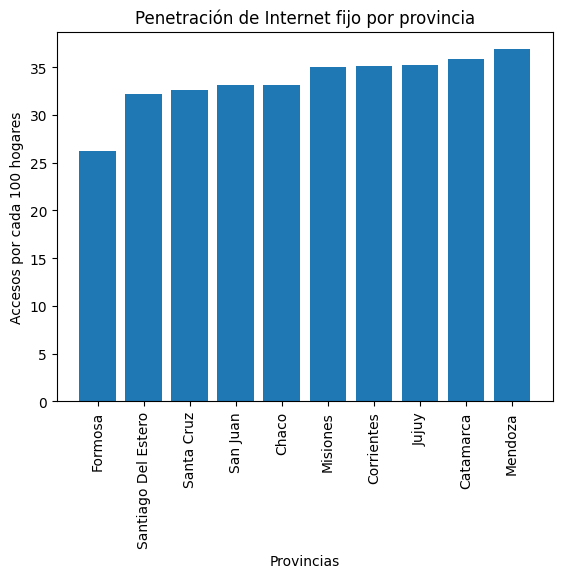

In [12]:
#  Creación de un gráfico de barras para visualizar las provincias con menos acceso

fig, ax = plt.subplots()

x = Penetración_Internet_fijo_cada_100_hogares_agrupado.index
y = Penetración_Internet_fijo_cada_100_hogares_agrupado['Accesos por cada 100 hogares']

ax.bar(x, y)

ax.set_xlabel('Provincias')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Penetración de Internet fijo por provincia')

ax.set_xticklabels(Penetración_Internet_fijo_cada_100_hogares_agrupado.index,rotation=90)

Se puede concluir que las provincias que menor acceso a Internet tienen son: Formosa, Santiago del Estero, Santa Cruz, San Juan y Chaco. Para aumentar los accesos se crea el KPI 1, donde se plantea un aumento del 2% para el próximo trimestre en todas las provincias. Se considera pertinente realizar un mayor seguimiento a las provincias mencionadas anteriormente.

Análisis del segundo dataset obtenido - Penetración_por_hogares_nacional_de_Internet_fijo

In [13]:
# Vista global
Penetración_por_hogares_nacional_de_Internet_fijo

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021
5,2021,2,"69,24","21,55",Abr-Jun 2021
6,2021,1,"67,95","21,13",Ene-Mar 2021
7,2020,4,"67,62","21,01",Oct-Dic 2020
8,2020,3,"66,31","20,59",Jul-Sept 2020
9,2020,2,"64,21","19,92",Abr-Jun 2020


In [14]:
# Chequeo del tipo de datos
Penetración_por_hogares_nacional_de_Internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [15]:
# Reemplazo de ',' por '.'y 'object'por 'float'
Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hogares'] = Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hab'] = Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)

# Chequeo de los cambios realizados anteriormente
Penetración_por_hogares_nacional_de_Internet_fijo


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022
3,2021,4,73.18,22.81,Oct-Dic 2021
4,2021,3,70.58,21.98,Jul-Sept 2021
5,2021,2,69.24,21.55,Abr-Jun 2021
6,2021,1,67.95,21.13,Ene-Mar 2021
7,2020,4,67.62,21.01,Oct-Dic 2020
8,2020,3,66.31,20.59,Jul-Sept 2020
9,2020,2,64.21,19.92,Abr-Jun 2020


In [16]:
# Chequeo de los cambios realizados anteriormente
Penetración_por_hogares_nacional_de_Internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [17]:
# Chequeo de ratios para chequear consistencia de los datos
Penetración_por_hogares_nacional_de_Internet_fijo.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


Se puede ver que la media ronda los 60 hogares cada 100, osea mas de la mitad y 18 habitantes cada 100, una valor mucho menor. Tambien un máximo de 76 hogares y 23 habitantes.

Text(0.5, 1.0, 'Histograma de Penetración de Internet')

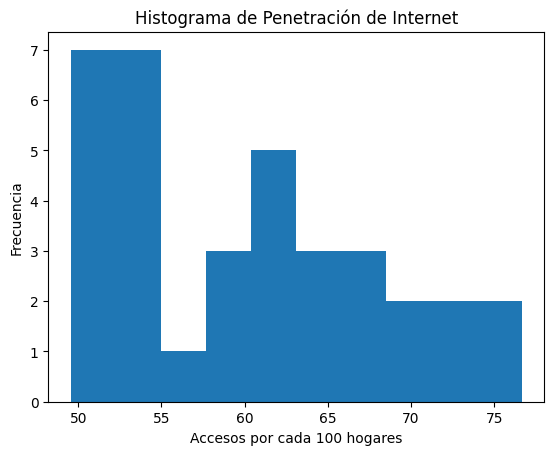

In [18]:
# Chequeo de distribución por hogares
plt.hist(Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.title('Histograma de Penetración de Internet')

Text(0.5, 1.0, 'Histograma de Penetración de Internet')

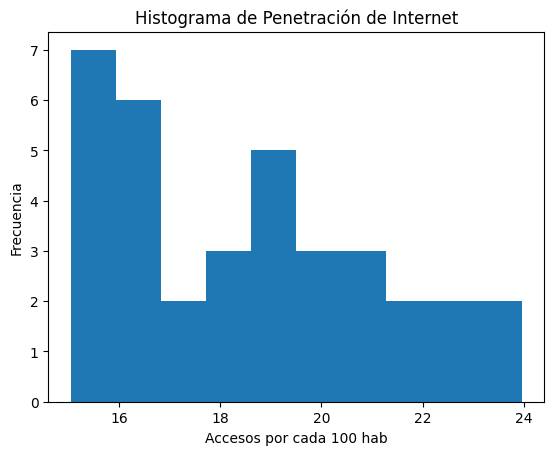

In [19]:
# Chequeo de distribución por habitantes
plt.hist(Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hab'])
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Frecuencia')
plt.title('Histograma de Penetración de Internet')

Text(0.5, 1.0, 'Boxplot de Penetración de Internet')

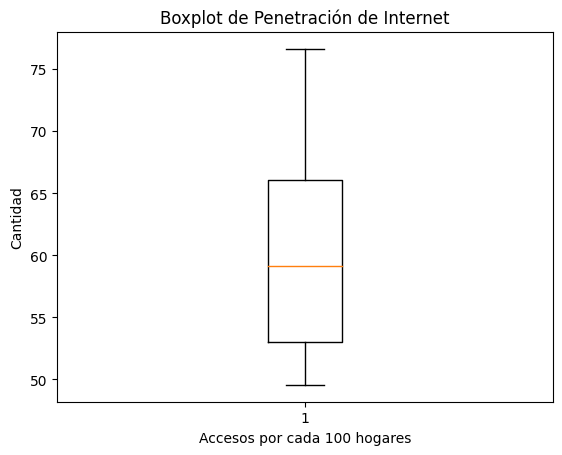

In [20]:
# Chequeo de posibles outliers por hogares
plt.boxplot(Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Cantidad')
plt.title('Boxplot de Penetración de Internet')

Text(0.5, 1.0, 'Boxplot de Penetración de Internet')

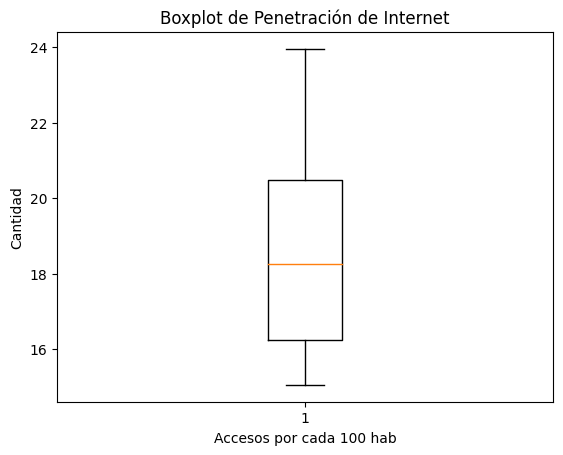

In [21]:
# Chequeo de posibles outliers por habitantes
plt.boxplot(Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hab'])
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Cantidad')
plt.title('Boxplot de Penetración de Internet')

No se obervan outliers

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\1395075316.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Penetración_por_hogares_nacional_de_Internet_fijo['Periodo'],rotation=90)


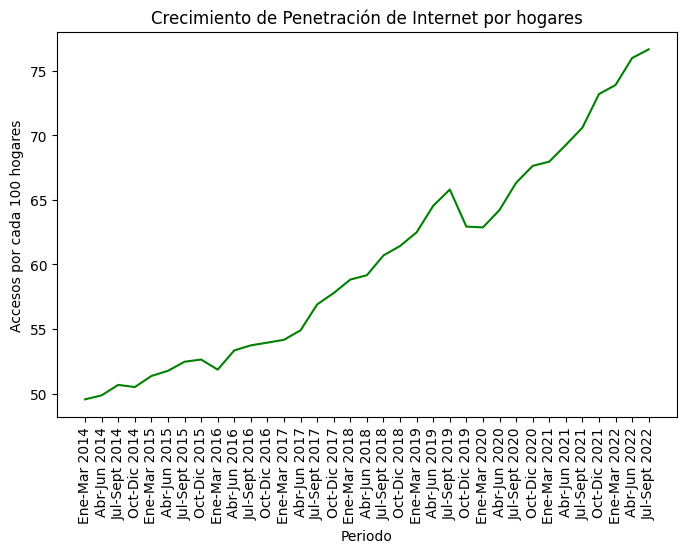

In [22]:
# Gráfico de crecimiento de penetración de internet por cada 100 hogares
x= Penetración_por_hogares_nacional_de_Internet_fijo['Periodo']
y= Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hogares']

fig,ax=plt.subplots(figsize=(8,5))
ax.set_xlabel('Periodo')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Crecimiento de Penetración de Internet por hogares')
ax.set_xticklabels(Penetración_por_hogares_nacional_de_Internet_fijo['Periodo'],rotation=90)
ax.plot(x,y,color="g")

plt.gca().invert_xaxis()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\251957952.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Penetración_por_hogares_nacional_de_Internet_fijo['Periodo'],rotation=90)


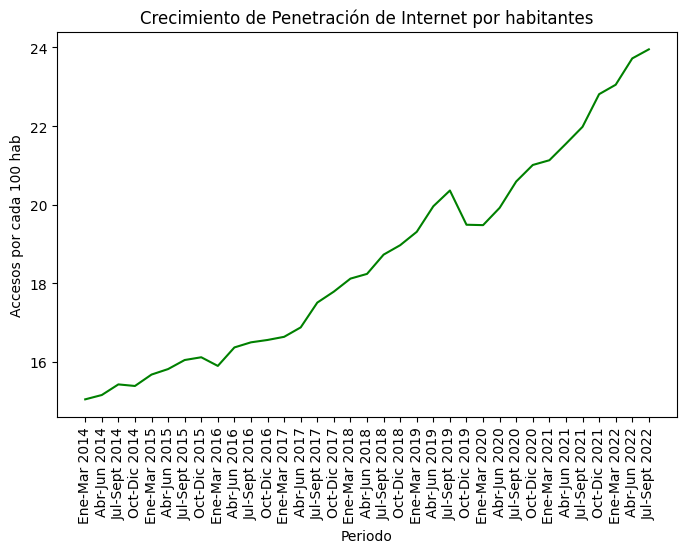

In [23]:
# Gráfico de crecimiento de penetración de internet por cada 100 habitantes
x= Penetración_por_hogares_nacional_de_Internet_fijo['Periodo']
y= Penetración_por_hogares_nacional_de_Internet_fijo['Accesos por cada 100 hab']

fig,ax=plt.subplots(figsize=(8,5))
ax.set_xlabel('Periodo')
ax.set_ylabel('Accesos por cada 100 hab')
ax.set_title('Crecimiento de Penetración de Internet por habitantes')
ax.set_xticklabels(Penetración_por_hogares_nacional_de_Internet_fijo['Periodo'],rotation=90)
ax.plot(x,y,color="g")

plt.gca().invert_xaxis()

Se puede concluir que el acceso a internet en Argentina esta en continuo crecimiento. Este análisis es sumamente positivo para objetivo de la empresa propuesto en el KPI 1.

Análisis del tercer dataset obtenido - Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta

In [24]:
# Vista global
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021
5,2021,2,9.852.702,10.382,9.863.084,Abr-Jun 2021
6,2021,1,9.637.956,10.016,9.647.972,Ene-Mar 2021
7,2020,4,9.561.546,10.016,9.571.562,Oct-Dic 2020
8,2020,3,9.346.183,10.016,9.356.199,Jul-Sept 2020
9,2020,2,9.021.040,10.016,9.031.056,Abr-Jun 2020


In [25]:
# Chequeo del tipo de datos
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [26]:
# Reemplazo de '.' por ',' y 'object' y 'float' por 'int'
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Banda ancha fija'] = Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Banda ancha fija'].apply(lambda x: int(str(x).replace('.', '')))
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Dial up'] = Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Dial up'].astype(object)
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Dial up'] = Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Dial up'].apply(lambda x: int(str(x).replace('.', '')))
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Total'] = Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Total'].apply(lambda x: int(str(x).replace('.', '')))

# Chequeo de los cambios realizados anteriormente
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11078691,12437,11091128,Jul-Sept 2022
1,2022,2,10946248,12436,10958684,Abr-Jun 2022
2,2022,1,10611390,12619,10624009,Ene-Mar 2022
3,2021,4,10476933,12861,10489794,Oct-Dic 2021
4,2021,3,10075184,10357,10085541,Jul-Sept 2021
5,2021,2,9852702,10382,9863084,Abr-Jun 2021
6,2021,1,9637956,10016,9647972,Ene-Mar 2021
7,2020,4,9561546,10016,9571562,Oct-Dic 2020
8,2020,3,9346183,10016,9356199,Jul-Sept 2020
9,2020,2,9021040,10016,9031056,Abr-Jun 2020


In [27]:
# Chequeo de los cambios realizados anteriormente
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               35 non-null     int64 
 1   Trimestre         35 non-null     int64 
 2   Banda ancha fija  35 non-null     int64 
 3   Dial up           35 non-null     int64 
 4   Total             35 non-null     int64 
 5   Periodo           35 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\345914363.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Periodo'],rotation=90)


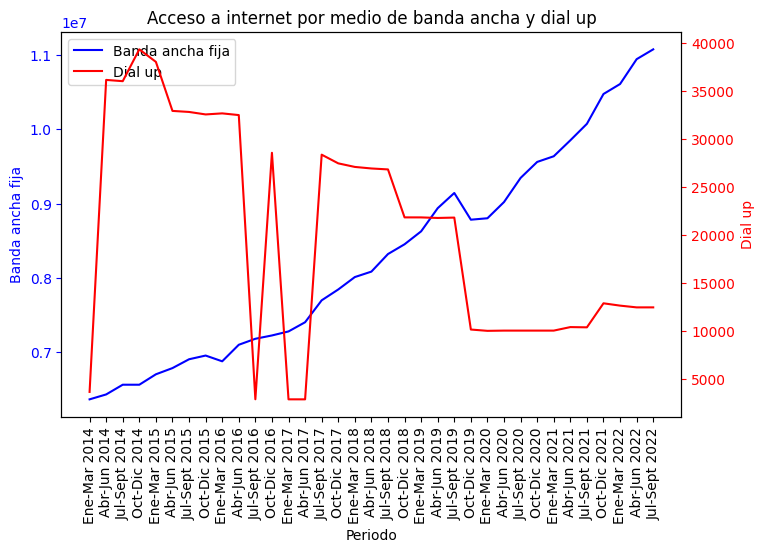

In [28]:
# Gráfico de crecimiento del acceso a internet por medio de banda ancha y dial up por año
x= Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Periodo']
y1= Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Banda ancha fija']
y2= Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Dial up']

fig,ax1=plt.subplots(figsize=(8,5))

ax1.plot(x,y1,'b-',label='Banda ancha fija')
ax1.set_xlabel('Periodo')
ax1.set_ylabel('Banda ancha fija',color='b')
ax1.tick_params('y',colors='b')

ax2=ax1.twinx()
ax2.plot(x,y2,'r-',label='Dial up')
ax2.set_ylabel('Dial up',color='r')
ax2.tick_params('y',colors='r')

lines=[ax1.get_lines()[0],ax2.get_lines()[0]]
ax1.legend(lines,[line.get_label()for line in lines])

plt.title('Acceso a internet por medio de banda ancha y dial up')

ax1.set_xticklabels(Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta['Periodo'],rotation=90)

plt.gca().invert_xaxis()


In [29]:
# Chequeo de ratios para chequear consistencia de los datos
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta.describe()



,Año,Trimestre,Banda ancha fija,Dial up,Total
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01
mean,2017.885714,2.457143,8.274417e+06,20247.000000,8.297800e+06
std,2.564135,1.120474,1.408774e+06,11533.554299,1.399611e+06
min,2014.000000,1.000000,6.362108e+06,2853.000000,6.398398e+06
25%,2016.000000,1.500000,7.024946e+06,10072.000000,7.057455e+06
50%,2018.000000,2.000000,8.083533e+06,21793.000000,8.110444e+06
75%,2020.000000,3.000000,9.244537e+06,30510.000000,9.260442e+06
max,2022.000000,4.000000,1.107869e+07,39324.000000,1.109113e+07


In [30]:
# Agrupación de los datos por año
Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta.groupby('Año')['Banda ancha fija', 'Dial up'].sum()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\3081504511.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Total_nacional_de_accesos_a_Internet_fijo_por_banda_ancha_y_banda_angosta.groupby('Año')['Banda ancha fija', 'Dial up'].sum()


,Banda ancha fija,Dial up
Año,,
2014,25908873,115099
2015,27337549,136270
2016,28373776,96533
2017,30217820,61500
2018,32865578,102609
2019,35490694,75487
2020,36731204,40039
2021,40042775,43616
2022,32636329,37492


Se puede concluir que el acceso por banda ancha es mucho mayor el acceso por dial up. En linea con el KP1 1, se recomienda a la empresa realizar investigaciones y desarrollos en este área. 

Análisis del cuarto dataset obtenido - Accesos_a_banda_ancha_y_banda_angosta_por_provincia

In [31]:
# Vista global
Accesos_a_banda_ancha_y_banda_angosta_por_provincia

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26.304,460,26.764
836,2014,1,Santa Fe,506.000,612,506.612
837,2014,1,Santiago Del Estero,37.124,9,37.133
838,2014,1,Tierra Del Fuego,27.272,766,28.038


In [32]:
# Chequeo del tipo de datos
Accesos_a_banda_ancha_y_banda_angosta_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [33]:
# Reemplazo de 'object' por 'int'
Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Banda ancha fija'] = Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Banda ancha fija'].apply(lambda x: int(str(x).replace('.', '')))
Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'] = Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'].replace('- 0', '0')
Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'] = Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'].fillna('0')
Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'] = Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'].str.replace('.', '').astype('int64')
Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Total'] = Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Total'].apply(lambda x: int(str(x).replace('.', '')))

# Chequeo de los cambios realizados anteriormente
Accesos_a_banda_ancha_y_banda_angosta_por_provincia


C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\1417983403.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'] = Accesos_a_banda_ancha_y_banda_angosta_por_provincia['Dial up'].str.replace('.', '').astype('int64')


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4715469,6199,4721668
1,2022,3,Capital Federal,1545534,2145,1547679
2,2022,3,Catamarca,70292,1,70293
3,2022,3,Chaco,144141,5,144146
4,2022,3,Chubut,164874,904,165778
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26304,460,26764
836,2014,1,Santa Fe,506000,612,506612
837,2014,1,Santiago Del Estero,37124,9,37133
838,2014,1,Tierra Del Fuego,27272,766,28038


In [34]:
# Chequeo de los cambios realizados anteriormente
Accesos_a_banda_ancha_y_banda_angosta_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    int64 
 4   Dial up           840 non-null    int64 
 5   Total             840 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 39.5+ KB


In [35]:
# Chequeo de los cambios realizados anteriormente
print(Accesos_a_banda_ancha_y_banda_angosta_por_provincia.isna().sum())

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             0
Total               0
dtype: int64


In [36]:
# Agrupación de los datos por provincia
Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado = Accesos_a_banda_ancha_y_banda_angosta_por_provincia.groupby('Provincia')['Banda ancha fija', 'Dial up'].sum()

Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\1767503580.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado = Accesos_a_banda_ancha_y_banda_angosta_por_provincia.groupby('Provincia')['Banda ancha fija', 'Dial up'].sum()


,Banda ancha fija,Dial up
Provincia,,
Buenos Aires,123014356,340191
Capital Federal,48866626,204979
Catamarca,1311807,327
Chaco,3678217,468
Chubut,3328819,54067
Corrientes,3576358,512
Córdoba,26261491,4596
Entre Ríos,7249381,2569
Formosa,1395392,352


In [37]:
# Creación de dataframe
Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado = pd.DataFrame(Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado)

# Orden del DataFrame por la columna "Accesos por cada 100 hogares" de menor a mayor
Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado = Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado.sort_values(by='Banda ancha fija', ascending=True)

# Seleccion de los primeros 10 valores del DataFrame ordenado
Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado = Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado.head(10)

Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado


,Banda ancha fija,Dial up
Provincia,,
Santa Cruz,1178926,11409
Catamarca,1311807,327
Tierra Del Fuego,1326078,17686
Formosa,1395392,352
La Rioja,1504262,474
San Luis,2172857,9244
San Juan,2246761,18016
Jujuy,2404499,35
Santiago Del Estero,2700414,101


C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\3865265334.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado.index,rotation=90)


[Text(0, 0, 'Santa Cruz'),
 Text(1, 0, 'Catamarca'),
 Text(2, 0, 'Tierra Del Fuego'),
 Text(3, 0, 'Formosa'),
 Text(4, 0, 'La Rioja'),
 Text(5, 0, 'San Luis'),
 Text(6, 0, 'San Juan'),
 Text(7, 0, 'Jujuy'),
 Text(8, 0, 'Santiago Del Estero'),
 Text(9, 0, 'La Pampa')]

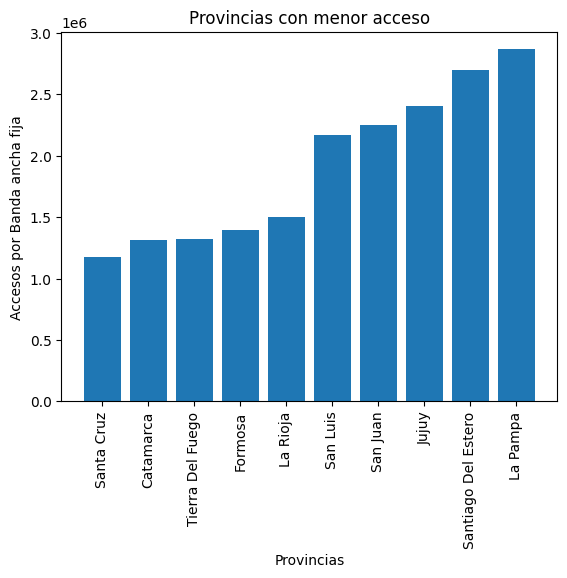

In [38]:
#  Creación de un gráfico de barras para visualizar las provincias con menos acceso

fig, ax = plt.subplots()

x = Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado.index
y = Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado['Banda ancha fija']

ax.bar(x, y)

ax.set_xlabel('Provincias')
ax.set_ylabel('Accesos por Banda ancha fija')
ax.set_title('Provincias con menor acceso')

ax.set_xticklabels(Accesos_a_banda_ancha_y_banda_angosta_por_provincia_agrupado.index,rotation=90)

Se puede concluir que las provincias que menor acceso a Internet por medio de banda ancha tienen son: Santa Cruz, Catamarca, Tierra del Fuego, Formosa y La Rioja. En linea con el KPI 1 se considera pertinente realizar un mayor seguimiento a las provincias mencionadas anteriormente.

Análisis del quinto dataset obtenido - Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología

In [39]:
# Vista global
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021
5,2021,2,2.018.587,5.641.731,1.472.246,476.968,253.552,9.863.084,Abr-Jun 2021
6,2021,1,2.175.211,5.424.782,1.362.976,434.548,250.455,9.647.972,Ene-Mar 2021
7,2020,4,2.213.949,5.371.824,1.311.199,421.554,253.036,9.571.562,Oct-Dic 2020
8,2020,3,2.263.889,5.259.351,1.170.879,413.259,248.821,9.356.199,Jul-Sept 2020
9,2020,2,2.295.533,5.005.115,1.106.725,376.667,247.016,9.031.056,Abr-Jun 2020


In [40]:
# Chequeo del tipo de datos
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [41]:
# Reemplazo de 'object' por 'int'
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['ADSL'] = Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['ADSL'].apply(lambda x: int(str(x).replace('.', '')))
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Cablemodem'] = Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Cablemodem'].apply(lambda x: int(str(x).replace('.', '')))
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Fibra óptica'] = Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Fibra óptica'].apply(lambda x: int(str(x).replace('.', '')))
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Total'] = Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Total'].apply(lambda x: int(str(x).replace('.', '')))
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Wireless'] = Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Wireless'].astype(str).apply(lambda x: int(float(x.replace('.', ''))))
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Otros'] = Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología['Otros'].astype(str).apply(lambda x: int(float(x.replace('.', ''))))

# Chequeo de los cambios realizados anteriormente
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,55711,23523,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
4,2021,3,1950631,5826257,1566048,492415,25019,10085541,Jul-Sept 2021
5,2021,2,2018587,5641731,1472246,476968,253552,9863084,Abr-Jun 2021
6,2021,1,2175211,5424782,1362976,434548,250455,9647972,Ene-Mar 2021
7,2020,4,2213949,5371824,1311199,421554,253036,9571562,Oct-Dic 2020
8,2020,3,2263889,5259351,1170879,413259,248821,9356199,Jul-Sept 2020
9,2020,2,2295533,5005115,1106725,376667,247016,9031056,Abr-Jun 2020


In [42]:
# Chequeo de los cambios realizados anteriormente
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


In [43]:
# Agrupación de los datos por año
Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología.groupby('Año')['ADSL','Cablemodem','Fibra óptica','Wireless','Otros','Total'].sum()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\62632329.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Serie_trimestral_de_accesos_a_Internet_fijo_por_tecnología.groupby('Año')['ADSL','Cablemodem','Fibra óptica','Wireless','Otros','Total'].sum()


,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
Año,,,,,,
2014,14884750,9975087,604862,305234,221063,26056633
2015,15115694,11162971,620877,255354,242846,27473819
2016,15073814,12177088,680127,260563,173876,28496058
2017,14639302,14148063,766312,432844,225596,30330683
2018,13981984,16571272,1079124,706400,292294,32968187
2019,11447626,18754974,3191409,1262831,909341,35566181
2020,9072828,20539964,4636620,1563813,958018,36771243
2021,7802044,22877010,6473506,1927038,781622,40086391
2022,4396850,18084610,7814359,1157768,507128,32673821


Con estas métricas se puede concluir que el uso de ADSL ha ido disminuyendo con el paso del tiempo, no asi las otras tecnologías. Aunque podemos ver que del 2021 al 2022 todas las tecnologías disminuyeron salvo la fibra óptica. Es por eso que se crea el KPI 3, donde se plantea aumentar en un 15% el acceso a internet por medio de fibra óptica. 

Análisis del sexto dataset obtenido - Acceso_a_Internet_fijo_por_tecnología_y_provincia

In [44]:
# Vista global
Acceso_a_Internet_fijo_por_tecnología_y_provincia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778
...,...,...,...,...,...,...,...,...,...
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032


In [45]:
# Chequeo del tipo de datos
Acceso_a_Internet_fijo_por_tecnología_y_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [46]:
# Eliminado de texto en la última fila
Acceso_a_Internet_fijo_por_tecnología_y_provincia.drop(index=840 , inplace=True)

In [47]:
# Reemplazo de 'object' y 'float' por 'int'
Acceso_a_Internet_fijo_por_tecnología_y_provincia['Año'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Año'].str.replace(r'\D', '').astype('int64')
Acceso_a_Internet_fijo_por_tecnología_y_provincia['Trimestre'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Trimestre'].str.replace(r'\D', '').astype('int64')
Acceso_a_Internet_fijo_por_tecnología_y_provincia['ADSL'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['ADSL'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_fijo_por_tecnología_y_provincia['Cablemodem'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Cablemodem'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_fijo_por_tecnología_y_provincia['Fibra óptica'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Fibra óptica'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_fijo_por_tecnología_y_provincia['Total'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Total'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_fijo_por_tecnología_y_provincia['Wireless'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Wireless'].astype(str).apply(lambda x: int(float(x.replace('.', ''))))
Acceso_a_Internet_fijo_por_tecnología_y_provincia['Otros'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Otros'].astype(str).apply(lambda x: int(float(x.replace('.', ''))))

Acceso_a_Internet_fijo_por_tecnología_y_provincia

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\1064167395.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Acceso_a_Internet_fijo_por_tecnología_y_provincia['Año'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Año'].str.replace(r'\D', '').astype('int64')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\1064167395.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Acceso_a_Internet_fijo_por_tecnología_y_provincia['Trimestre'] = Acceso_a_Internet_fijo_por_tecnología_y_provincia['Trimestre'].str.replace(r'\D', '').astype('int64')


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778
...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,18927,100,381,4092,3264,26764
836,2014,1,Santa Fe,322662,174296,3059,5951,6440,506612
837,2014,1,Santiago Del Estero,32567,3598,19,9150,340,37133
838,2014,1,Tierra Del Fuego,21618,2837,648,10,2934,28038


In [48]:
# Chequeo de los cambios realizados anteriormente
Acceso_a_Internet_fijo_por_tecnología_y_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    int64 
 1   Trimestre     840 non-null    int64 
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    int64 
 4   Cablemodem    840 non-null    int64 
 5   Fibra óptica  840 non-null    int64 
 6   Wireless      840 non-null    int64 
 7   Otros         840 non-null    int64 
 8   Total         840 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 59.2+ KB


In [49]:
# Agrupación de los datos por provincia
Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado = Acceso_a_Internet_fijo_por_tecnología_y_provincia.groupby('Provincia')['ADSL','Cablemodem','Fibra óptica','Wireless','Otros'].sum()

Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\1055800535.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado = Acceso_a_Internet_fijo_por_tecnología_y_provincia.groupby('Provincia')['ADSL','Cablemodem','Fibra óptica','Wireless','Otros'].sum()


,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
Provincia,,,,,
Buenos Aires,40561026,64072849,15260042,2045824,1236939
Capital Federal,11742699,35195760,1378718,115443,629355
Catamarca,841978,134903,277369,29445,49670
Chaco,1729750,1457227,343593,123077,37080
Chubut,1632717,769308,91807,520109,287441
Corrientes,1822905,1481200,97100,99674,73372
Córdoba,10711013,12237764,2168773,799631,297984
Entre Ríos,3425188,2833674,301631,435086,228255
Formosa,736555,312010,58052,249358,40030


[Text(0.15, 0, 'Buenos Aires'),
 Text(1.15, 0, 'Capital Federal'),
 Text(2.15, 0, 'Catamarca'),
 Text(3.15, 0, 'Chaco'),
 Text(4.15, 0, 'Chubut'),
 Text(5.15, 0, 'Corrientes'),
 Text(6.15, 0, 'Córdoba'),
 Text(7.15, 0, 'Entre Ríos'),
 Text(8.15, 0, 'Formosa'),
 Text(9.15, 0, 'Jujuy'),
 Text(10.15, 0, 'La Pampa'),
 Text(11.15, 0, 'La Rioja'),
 Text(12.15, 0, 'Mendoza'),
 Text(13.15, 0, 'Misiones'),
 Text(14.15, 0, 'Neuquén'),
 Text(15.15, 0, 'Río Negro'),
 Text(16.15, 0, 'Salta'),
 Text(17.15, 0, 'San Juan'),
 Text(18.15, 0, 'San Luis'),
 Text(19.15, 0, 'Santa Cruz'),
 Text(20.15, 0, 'Santa Fe'),
 Text(21.15, 0, 'Santiago Del Estero'),
 Text(22.15, 0, 'Tierra Del Fuego'),
 Text(23.15, 0, 'Tucumán')]

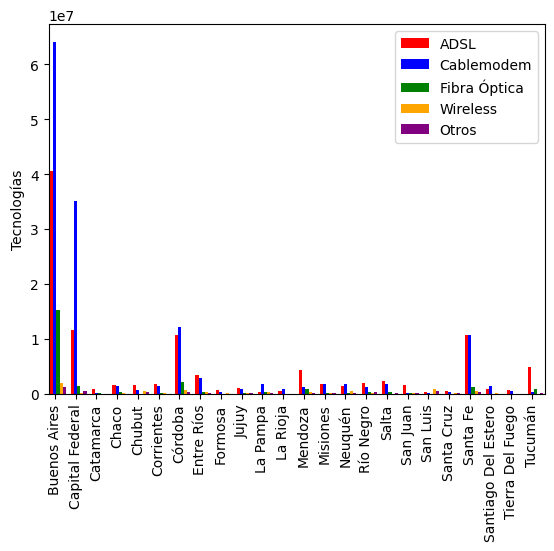

In [50]:
# Creación de un gráfico de barras para visualizar las provincias y las tecnologías
provincia= Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado.index
variable1 = Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado['ADSL']
variable2 = Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado['Cablemodem']
variable3 = Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado['Fibra óptica']
variable4 = Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado['Wireless']
variable5 = Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado['Otros']

fig, ax = plt.subplots()

ancho_barra = 0.15

posicion1 = np.arange(len(provincia))
posicion2 = [x + ancho_barra for x in posicion1]
posicion3 = [x + ancho_barra for x in posicion2]
posicion4 = [x + ancho_barra for x in posicion3]
posicion5 = [x + ancho_barra for x in posicion4]

ax.bar(posicion1, variable1, width=ancho_barra, color='red', label='ADSL')
ax.bar(posicion2, variable2, width=ancho_barra, color='blue', label='Cablemodem')
ax.bar(posicion3, variable3, width=ancho_barra, color='green', label='Fibra Óptica')
ax.bar(posicion4, variable4, width=ancho_barra, color='orange', label='Wireless')
ax.bar(posicion5, variable5, width=ancho_barra, color='purple', label='Otros')


ax.set_ylabel('Tecnologías')
ax.legend()

ax.set_xticks(posicion2)
ax.set_xticklabels(provincia)
ax.set_xlim([min(posicion1) - ancho_barra, max(posicion5) + ancho_barra])

ax.set_xticklabels(Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado.index,rotation=90)

Utilizando como base la conclusión del dataset anterior, donde se menciona la disminución del ADSL pero el aumento de la fibra óptica, y el gráfico de arriba, podemos notar que las provincias de Formosa, La Rioja, San Luis, Santiago del Estero y Tierra del Fuego son las que menos se accede a internet por medio de fibra óptica. Sin embargo, en estas provincias, la tecnología mas utilizada es el ADSL. Por esto, se decidió tomar estas provincias en especifico para el KPI 3 anteriormente mencionado.

Análisis del séptimo dataset obtenido - Velocidad_Media_de_bajada_de_Internet_fijo

In [51]:
# Vista global
Velocidad_Media_de_bajada_de_Internet_fijo

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021
5,2021,2,"45,63",Abr-Jun 2021
6,2021,1,"43,11",Ene-Mar 2021
7,2020,4,"42,36",Oct-Dic 2020
8,2020,3,"40,67",Jul-Sept 2020
9,2020,2,"38,32",Abr-Jun 2020


In [52]:
# Chequeo del tipo de datos
Velocidad_Media_de_bajada_de_Internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [53]:
# Reemplazo de ',' por '.' y 'object' por 'float'
Velocidad_Media_de_bajada_de_Internet_fijo['Mbps (Media de bajada)']=Velocidad_Media_de_bajada_de_Internet_fijo['Mbps (Media de bajada)'].str.replace(',', '.').astype(float)

# Chequeo de los cambios realizados anteriormente
Velocidad_Media_de_bajada_de_Internet_fijo

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,62.46,Jul-Sept 2022
1,2022,2,58.44,Abr-Jun 2022
2,2022,1,55.11,Ene-Mar 2022
3,2021,4,52.34,Oct-Dic 2021
4,2021,3,48.46,Jul-Sept 2021
5,2021,2,45.63,Abr-Jun 2021
6,2021,1,43.11,Ene-Mar 2021
7,2020,4,42.36,Oct-Dic 2020
8,2020,3,40.67,Jul-Sept 2020
9,2020,2,38.32,Abr-Jun 2020


In [54]:
# Chequeo de los cambios realizados anteriormente
Velocidad_Media_de_bajada_de_Internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     35 non-null     int64  
 1   Trimestre               35 non-null     int64  
 2   Mbps (Media de bajada)  35 non-null     float64
 3   Trimestre.1             35 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [55]:
# Renombre de la columna Trimestre 1 por Periodo
Velocidad_Media_de_bajada_de_Internet_fijo = Velocidad_Media_de_bajada_de_Internet_fijo.rename(columns={'Trimestre.1': 'Periodo'})

#Chequeo de los cambios realizados anteriormente
Velocidad_Media_de_bajada_de_Internet_fijo


,Año,Trimestre,Mbps (Media de bajada),Periodo
0,2022,3,62.46,Jul-Sept 2022
1,2022,2,58.44,Abr-Jun 2022
2,2022,1,55.11,Ene-Mar 2022
3,2021,4,52.34,Oct-Dic 2021
4,2021,3,48.46,Jul-Sept 2021
5,2021,2,45.63,Abr-Jun 2021
6,2021,1,43.11,Ene-Mar 2021
7,2020,4,42.36,Oct-Dic 2020
8,2020,3,40.67,Jul-Sept 2020
9,2020,2,38.32,Abr-Jun 2020


In [56]:
# Chequeo de ratios para chequear consistencia de los datos
Velocidad_Media_de_bajada_de_Internet_fijo.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,21.827143
std,2.564135,1.120474,19.230717
min,2014.000000,1.000000,3.620000
25%,2016.000000,1.500000,5.250000
50%,2018.000000,2.000000,13.850000
75%,2020.000000,3.000000,39.495000
max,2022.000000,4.000000,62.460000


Text(0.5, 1.0, 'Boxplot de velocidad media de bajada')

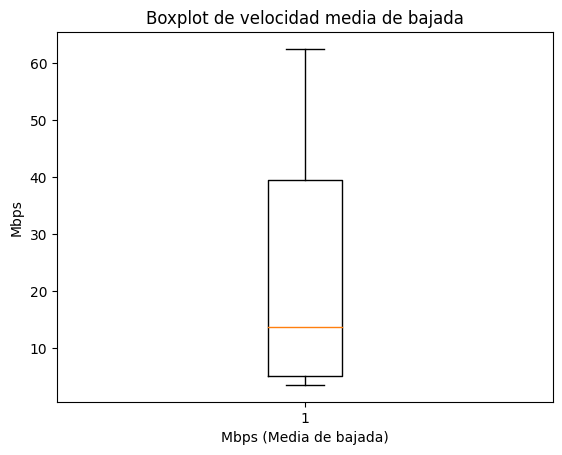

In [57]:
# Chequeo de los posibles outliers 
plt.boxplot(Velocidad_Media_de_bajada_de_Internet_fijo['Mbps (Media de bajada)'])
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Mbps')
plt.title('Boxplot de velocidad media de bajada')

No se observan outliers

In [58]:
# Agrupación de los datos por año
Velocidad_Media_de_bajada_de_Internet_fijo_agrupado = Velocidad_Media_de_bajada_de_Internet_fijo.groupby('Año')['Mbps (Media de bajada)'].mean()

Velocidad_Media_de_bajada_de_Internet_fijo_agrupado

Año
2014     3.8525
2015     4.6700
2016     5.6950
2017     8.5325
2018    14.5950
2019    22.5375
2020    39.7175
2021    47.3850
2022    58.6700
Name: Mbps (Media de bajada), dtype: float64

Se puede concluir que a partir de 2017 hay una tendencia de crecimiento fuerte, para eso se crea el KPI 2 con el objetivo de continuar ese crecimiento el próximo trimestre. Se busca un crecimiento del 10%.

Análisis del octavo dataset obtenido - Velocidad_media_de_bajada_de_Internet_fijo_por_provincia

In [59]:
# Vista Global
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,3,NaN,NaN
836,2014,1,Santa Fe,3,NaN,NaN
837,2014,1,Santiago Del Estero,3,NaN,NaN
838,2014,1,Tierra Del Fuego,3,NaN,NaN


In [60]:
# Chequeo del tipo de datos
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [61]:
# Chequeo de nulos
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Mbps (Media de bajada)      0
Unnamed: 4                840
Unnamed: 5                840
dtype: int64

In [62]:
# Eliminado de columnas sin datos
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia = Velocidad_media_de_bajada_de_Internet_fijo_por_provincia.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1) 

Velocidad_media_de_bajada_de_Internet_fijo_por_provincia

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16
...,...,...,...,...
835,2014,1,Santa Cruz,3
836,2014,1,Santa Fe,3
837,2014,1,Santiago Del Estero,3
838,2014,1,Tierra Del Fuego,3


In [63]:
# Agrupación de los datos por provincia
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado = Velocidad_media_de_bajada_de_Internet_fijo_por_provincia.groupby('Provincia')['Mbps (Media de bajada)'].mean()

Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado

Provincia
Buenos Aires           24.600000
Capital Federal        33.285714
Catamarca              18.000000
Chaco                  18.171429
Chubut                  5.828571
Corrientes             15.285714
Córdoba                19.600000
Entre Ríos             14.200000
Formosa                12.171429
Jujuy                  11.742857
La Pampa                6.371429
La Rioja               12.342857
Mendoza                 8.714286
Misiones               16.142857
Neuquén                18.028571
Río Negro              12.542857
Salta                  14.314286
San Juan                5.628571
San Luis               11.314286
Santa Cruz              5.542857
Santa Fe               15.771429
Santiago Del Estero     7.571429
Tierra Del Fuego        5.857143
Tucumán                19.171429
Name: Mbps (Media de bajada), dtype: float64

In [64]:
# Creación de DataFrame
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado = pd.DataFrame(Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado)

# Orden del DataFrame por la columna "Mbps" de menor a mayor
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado = Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado.sort_values(by='Mbps (Media de bajada)', ascending=True)

# Seleccion de los primeros 10 valores del DataFrame ordenado
Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado = Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado.head(10)

Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado

,Mbps (Media de bajada)
Provincia,
Santa Cruz,5.542857
San Juan,5.628571
Chubut,5.828571
Tierra Del Fuego,5.857143
La Pampa,6.371429
Santiago Del Estero,7.571429
Mendoza,8.714286
San Luis,11.314286
Jujuy,11.742857


C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\2103275301.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado.index,rotation=90)


[Text(0, 0, 'Santa Cruz'),
 Text(1, 0, 'San Juan'),
 Text(2, 0, 'Chubut'),
 Text(3, 0, 'Tierra Del Fuego'),
 Text(4, 0, 'La Pampa'),
 Text(5, 0, 'Santiago Del Estero'),
 Text(6, 0, 'Mendoza'),
 Text(7, 0, 'San Luis'),
 Text(8, 0, 'Jujuy'),
 Text(9, 0, 'Formosa')]

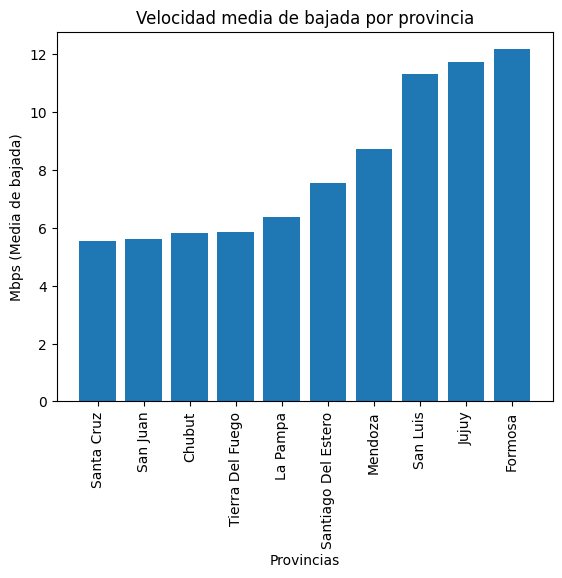

In [65]:
#  Creación de un gráfico de barras para visualizar las provincias con menor velocidad

fig, ax = plt.subplots()

x = Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado.index
y = Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado['Mbps (Media de bajada)']

ax.bar(x, y)

ax.set_xlabel('Provincias')
ax.set_ylabel('Mbps (Media de bajada)')
ax.set_title('Velocidad media de bajada por provincia')

ax.set_xticklabels(Velocidad_media_de_bajada_de_Internet_fijo_por_provincia_agrupado.index,rotation=90)

Se puede concluir que las provincias de Santa Cruz, San Juan, Chubut, Tierra del Fuego y La Pampa son aquellas que menor velocidad media de bajada poseen, por lo tanto si bien el KPI 2 se plantea para todas las provincias, se sugiere que el cliente realice un seguimiento en las provincias anteriormente nombradas.

Análisis del noveno dataset obtenido - Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad

In [66]:
# Vista global
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128,NaN
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
3,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
4,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN
5,2021,2,40.172,42.024,2.531.271,1.080.279,693.277,647.401,4.661.291,167.369,9.863.084,NaN
6,2021,1,39.487,41.674,2.593.477,1.072.722,737.930,595.920,4.379.965,186.797,9.647.972,NaN
7,2020,4,39.510,42.185,2.622.638,1.073.875,786.595,582.420,4.239.237,185.102,9.571.562,NaN
8,2020,3,41.038,44.005,2.637.984,1.040.017,799.350,538.567,4.053.461,201.777,9.356.199,NaN
9,2020,2,41.038,48.690,2.651.502,1.053.107,807.775,523.437,3.711.499,194.008,9.031.056,NaN


In [67]:
# Chequeo del tipo de datos 
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.4+ KB


In [68]:
# Reemplazo de '.' por ',' y 'object' y 'float' por 'int'

Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Hasta 512 kbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Hasta 512 kbps'].astype(object)
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Hasta 512 kbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Hasta 512 kbps'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 512 Kbps y 1 Mbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 512 Kbps y 1 Mbps'].astype(object)
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 512 Kbps y 1 Mbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 512 Kbps y 1 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 1 Mbps y 6 Mbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 1 Mbps y 6 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 6 Mbps y 10 Mbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 6 Mbps y 10 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 10 Mbps y 20 Mbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 10 Mbps y 20 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 20 Mbps y 30 Mbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Entre 20 Mbps y 30 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Más de 30 Mbps'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Más de 30 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['OTROS'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['OTROS'].astype(object)
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['OTROS'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['OTROS'].apply(lambda x: int(str(x).replace('.', '')))
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Total'] = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad['Total'].apply(lambda x: int(str(x).replace('.', '')))


# Chequeo de los cambios realizados anteriormente
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128,NaN
1,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684,NaN
2,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009,NaN
3,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794,NaN
4,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541,NaN
5,2021,2,40172,42024,2531271,1080279,693277,647401,4661291,167369,9863084,NaN
6,2021,1,39487,41674,2593477,1072722,737930,595920,4379965,186797,9647972,NaN
7,2020,4,3951,42185,2622638,1073875,786595,582420,4239237,185102,9571562,NaN
8,2020,3,41038,44005,2637984,1040017,799350,538567,4053461,201777,9356199,NaN
9,2020,2,41038,4869,2651502,1053107,807775,523437,3711499,194008,9031056,NaN


In [69]:
# Chequeo de los cambios realizados anteriormente
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     int64  
 3   Entre 512 Kbps y 1 Mbps  35 non-null     int64  
 4   Entre 1 Mbps y 6 Mbps    35 non-null     int64  
 5   Entre 6 Mbps y 10 Mbps   35 non-null     int64  
 6   Entre 10 Mbps y 20 Mbps  35 non-null     int64  
 7   Entre 20 Mbps y 30 Mbps  35 non-null     int64  
 8   Más de 30 Mbps           35 non-null     int64  
 9   OTROS                    35 non-null     int64  
 10  Total                    35 non-null     int64  
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(1), int64(11)
memory usage: 3.4 KB


In [70]:
# Eliminado de columnas sin datos
Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad = Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad.drop(['Unnamed: 11'], axis=1) 

Distribución_de_los_accesos_totales_nacionales_a_Internet_fijo_por_velocidad

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
1,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
2,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009
3,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
4,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541
5,2021,2,40172,42024,2531271,1080279,693277,647401,4661291,167369,9863084
6,2021,1,39487,41674,2593477,1072722,737930,595920,4379965,186797,9647972
7,2020,4,3951,42185,2622638,1073875,786595,582420,4239237,185102,9571562
8,2020,3,41038,44005,2637984,1040017,799350,538567,4053461,201777,9356199
9,2020,2,41038,4869,2651502,1053107,807775,523437,3711499,194008,9031056


Se considera este dataset no tan relevante como los anteriores, por esto no se realizan mas análisis.

Análisis del décimo dataset obtenido - Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia

In [71]:
# Vista global
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,161.000,1.625,24.972,1.000,1.000,0.000,0,0.000,26.760
836,2014,1,Santa Fe,8.456,124.468,345.225,20.328,6.845,23.000,668,0.000,506.013
837,2014,1,Santiago Del Estero,1.234,10.531,22.817,2.422,109.000,0.000,0,0.000,37.113
838,2014,1,Tierra Del Fuego,12.000,607.000,30.902,6.000,0.000,0.000,0,0.000,31.527


In [72]:
# Chequeo de los valores nulos
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia.isnull().sum()


Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [73]:
# Reemplazo de los nulos por 0
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['OTROS'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['OTROS'].fillna(0)

In [74]:
# Chequeo del tipo de datos 
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                840 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [75]:
# Reemplazo de '.' por ',' y 'object' y 'float' por 'int'

Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['HASTA 512 kbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['HASTA 512 kbps'].astype(object)
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['HASTA 512 kbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['HASTA 512 kbps'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 512 Kbps - 1 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 512 Kbps - 1 Mbps'].astype(object)
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 512 Kbps - 1 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 512 Kbps - 1 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 1 Mbps - 6 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 1 Mbps - 6 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 6 Mbps - 10 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 6 Mbps - 10 Mbps'].astype(object)
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 6 Mbps - 10 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 6 Mbps - 10 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 10 Mbps - 20 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 10 Mbps - 20 Mbps'].astype(object)
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 10 Mbps - 20 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 10 Mbps - 20 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 20 Mbps - 30 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 20 Mbps - 30 Mbps'].astype(object)
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 20 Mbps - 30 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 20 Mbps - 30 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 30 Mbps'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['+ 30 Mbps'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['OTROS'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['OTROS'].astype(object)
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['OTROS'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['OTROS'].apply(lambda x: int(str(x).replace('.', '')))
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['Total'] = Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia['Total'].apply(lambda x: int(str(x).replace('.', '')))


# Chequeo de los cambios realizados anteriormente
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821,4721668
1,2022,3,Capital Federal,5170,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,710,3840,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,4610,9870,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,1090,1444,45707,3094,34682,15309,17563,20024,165778
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,1610,1625,24972,10,10,0,0,0,26760
836,2014,1,Santa Fe,8456,124468,345225,20328,6845,230,668,0,506013
837,2014,1,Santiago Del Estero,1234,10531,22817,2422,1090,0,0,0,37113
838,2014,1,Tierra Del Fuego,120,6070,30902,60,0,0,0,0,31527


In [76]:
# Chequeo de los cambios realizados anteriormente
Acceso_a_Internet_Fijo_por_rangos_de_velocidad_de_bajada_y_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    int64 
 1   Trimestre            840 non-null    int64 
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    int64 
 4   + 512 Kbps - 1 Mbps  840 non-null    int64 
 5   + 1 Mbps - 6 Mbps    840 non-null    int64 
 6   + 6 Mbps - 10 Mbps   840 non-null    int64 
 7   + 10 Mbps - 20 Mbps  840 non-null    int64 
 8   + 20 Mbps - 30 Mbps  840 non-null    int64 
 9   + 30 Mbps            840 non-null    int64 
 10  OTROS                840 non-null    int64 
 11  Total                840 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 78.9+ KB


Se considera este dataset no tan relevante como los anteriores, por esto no se realizan mas análisis.

Análisis del undécimo dataset obtenido - Accesos_a_Internet_fijo_por_velocidad_bajada_y_provincia

In [77]:
# Vista global
Accesos_a_Internet_fijo_por_velocidad_bajada_y_provincia

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,"4,611",...,"3,163",- 0,"98,387",- 0,2,223,- 0,1,- 0,- 0
1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,"1,307",...,3,- 0,"30,482",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2017.0,4.0,Santa Fe,"14,119",- 0,- 0,- 0,"3,109",- 0,"7,637",...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
477,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
478,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
479,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


Se considera este dataset incompleto, por esto no se realizan mas análisis.

Análisis del doceavo dataset obtenido - Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo

In [78]:
# Vista global
Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021
5,2021,2,38.239.667,Abr-Jun 2021
6,2021,1,36.676.371,Ene-Mar 2021
7,2020,4,33.539.703,Oct-Dic 2020
8,2020,3,31.997.445,Jul-Sept 2020
9,2020,2,32.102.476,Abr-Jun 2020


In [79]:
# Chequeo del tipo de datos
Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [80]:
# Reemplazo de 'object' por 'int'
Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo['Ingresos (miles de pesos)'] = Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo['Ingresos (miles de pesos)'].apply(lambda x: int(str(x).replace('.', '')))

Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930,Jul-Sept 2022
1,2022,2,60335724,Abr-Jun 2022
2,2022,1,55589997,Ene-Mar 2022
3,2021,4,45467887,Oct-Dic 2021
4,2021,3,42999944,Jul-Sept 2021
5,2021,2,38239667,Abr-Jun 2021
6,2021,1,36676371,Ene-Mar 2021
7,2020,4,33539703,Oct-Dic 2020
8,2020,3,31997445,Jul-Sept 2020
9,2020,2,32102476,Abr-Jun 2020


In [81]:
# Chequeo de los cambios realizados anteriormente
Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     int64 
 3   Periodo                    35 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [82]:
# Agrupación de los datos por año
Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado = Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo.groupby('Año')['Ingresos (miles de pesos)'].sum()

Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado

Año
2014     13683949
2015     20108814
2016     26867508
2017     39671973
2018     59539594
2019     86772531
2020    127585840
2021    163383869
2022    182981651
Name: Ingresos (miles de pesos), dtype: int64

In [83]:
# Creación de dataframe
Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado = pd.DataFrame(Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado)

Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado

,Ingresos (miles de pesos)
Año,
2014,13683949
2015,20108814
2016,26867508
2017,39671973
2018,59539594
2019,86772531
2020,127585840
2021,163383869
2022,182981651


C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\1900377414.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado.index,rotation=90)


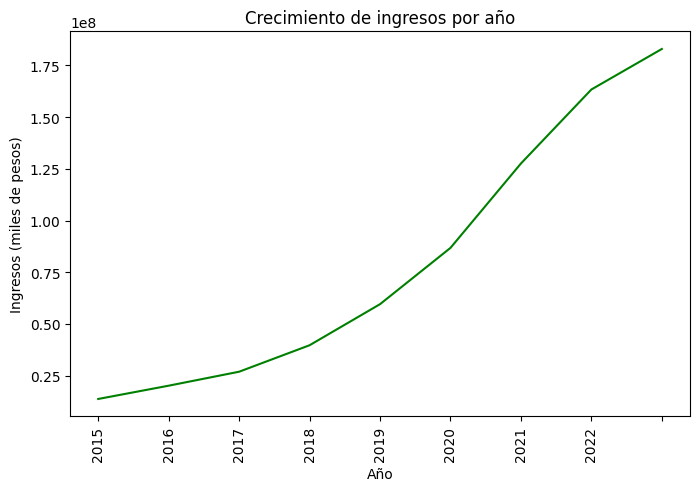

In [84]:
# Gráfico de crecimiento de ingresos por año
x= Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado.index
y= Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado['Ingresos (miles de pesos)']

fig,ax=plt.subplots(figsize=(8,5))
ax.set_xlabel('Año')
ax.set_ylabel('Ingresos (miles de pesos)')
ax.set_title('Crecimiento de ingresos por año')
ax.set_xticklabels(Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado.index,rotation=90)
ax.plot(x,y,color="g")


Se puede concluir que los ingresos generales por la prestación del servicio de internet fijo estan en constante crecimiento. Por este análisis se creo el KPI 4 con el objetivo de aumentar en el próximo trimestre un 20% más.

Análisis del décimotercer dataset obtenido - Accesos_a_Internet_fijo_por_velocidad_de_bajada_y_localidad

In [85]:
# Vista global
Accesos_a_Internet_fijo_por_velocidad_de_bajada_y_localidad

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
3094,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3095,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3096,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se considera este dataset incompleto, por esto no se realizan mas análisis.

Análisis del décimocuarto dataset obtenido - Accesos_a_Internet_fijo_por_tecnología_y_localidad

In [86]:
# Vista global
Accesos_a_Internet_fijo_por_tecnología_y_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,- 0,1,- 0,471,- 0,- 0,- 0,- 0,472,NaN
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,313,313,NaN
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,- 0,- 0,- 0,33,- 0,- 0,99,282,NaN
3140,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1.725,- 0,- 0,- 0,1,- 0,- 0,97,1.823,NaN


Se considera este dataset incompleto, por esto no se realizan mas análisis.

Análisis del décimoquinto dataset obtenido - Listado_de_localidades_con_conectividad_a_internet

In [87]:
# Vista global
Listado_de_localidades_con_conectividad_a_internet

,Provincia,Unnamed: 1,Localidad,ADSL,CABLEMODEM,Unnamed: 5,FIBRAOPTICA,4G,3G,Unnamed: 9,WIRELESS,Unnamed: 11
0,BUENOS AIRES,Bahía Blanca,NaN,--,--,--,NaN,SI,SI,--,--,NaN
1,NaN,Bahía Blanca,Villa Espora,NaN,NaN,--,--,--,NaN,--,NaN,--
2,BUENOS AIRES,Balcarce,Balcarce,NaN,SI,SI,SI,NaN,SI,SI,SI,--
3,NaN,Balcarce,Los Pinos,NaN,NaN,--,--,NaN,NaN,SI,SI,--
4,NaN,Balcarce,Napaleofú,--,NaN,--,SI,SI,NaN,SI,SI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,NaN,NaN,SI,--,NaN,NaN,SI,SI,NaN,SI,NaN
4308,CHACO,NaN,Villa El Palmar,--,--,NaN,--,SI,--,NaN,SI,--
4309,NaN,San Fernando,Barranqueras,NaN,NaN,--,SI,NaN,NaN,SI,NaN,--
4310,CHACO,San Fernando,Basail,NaN,SI,--,--,NaN,SI,SI,SI,SI


Se considera este dataset incompleto, por esto no se realizan mas análisis.

Dataset complementario - Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil

In [88]:
# Carga de datos complementarios
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil = pd.read_csv('datos/Ingresos trimestrales por la prestación del servicio de telefonía móvil.csv')

In [89]:
# Vista global
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,$ 13.135.235,Ene-Mar 2013
1,2013,2,$ 13.970.806,Abr-Jun 2013
2,2013,3,$ 15.235.659,Jul-Sept 2013
3,2013,4,$ 16.218.846,Oct-Dic 2013
4,2014,1,$ 15.938.353,Ene-Mar 2013
5,2014,2,$ 17.680.972,Abr-Jun 2014
6,2014,3,$ 18.976.053,Jul-Sept 2014
7,2014,4,$ 20.012.332,Oct-Dic 2014
8,2015,1,$ 19.337.342,Ene-Mar 2015
9,2015,2,$ 19.945.453,Abr-Jun 2015


In [90]:
# Chequeo del tipo de datos
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    39 non-null     int64 
 1   Trimestre              39 non-null     int64 
 2   Ingresos (miles de $)  39 non-null     object
 3   Periodo                39 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [91]:
# Renombre de la columna de ingresos
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil = Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil.rename(columns={'Ingresos (miles de $)': 'Ingresos (miles de pesos)'})

Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2013,1,$ 13.135.235,Ene-Mar 2013
1,2013,2,$ 13.970.806,Abr-Jun 2013
2,2013,3,$ 15.235.659,Jul-Sept 2013
3,2013,4,$ 16.218.846,Oct-Dic 2013
4,2014,1,$ 15.938.353,Ene-Mar 2013
5,2014,2,$ 17.680.972,Abr-Jun 2014
6,2014,3,$ 18.976.053,Jul-Sept 2014
7,2014,4,$ 20.012.332,Oct-Dic 2014
8,2015,1,$ 19.337.342,Ene-Mar 2015
9,2015,2,$ 19.945.453,Abr-Jun 2015


In [92]:
#  Reemplazo de 'object' por 'int'
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil['Ingresos (miles de pesos)'] = Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil['Ingresos (miles de pesos)'].apply(lambda x: int(str(x).replace('.', '').replace('$', '').strip()))


In [93]:
# Chequeo de los cambios realizados anteriormente
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        39 non-null     int64 
 1   Trimestre                  39 non-null     int64 
 2   Ingresos (miles de pesos)  39 non-null     int64 
 3   Periodo                    39 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [94]:
# Agrupación de los datos por año
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado = Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil.groupby('Año')['Ingresos (miles de pesos)'].sum()

Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado

Año
2013     58560546
2014     72607710
2015     85950000
2016    107676433
2017    138536546
2018    166694340
2019    231880240
2020    308729960
2021    443035884
2022    457544825
Name: Ingresos (miles de pesos), dtype: int64

In [95]:
# Creación de dataframe
Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado = pd.DataFrame(Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado)

Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado

,Ingresos (miles de pesos)
Año,
2013,58560546
2014,72607710
2015,85950000
2016,107676433
2017,138536546
2018,166694340
2019,231880240
2020,308729960
2021,443035884


C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\2647762553.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado.index,rotation=90)


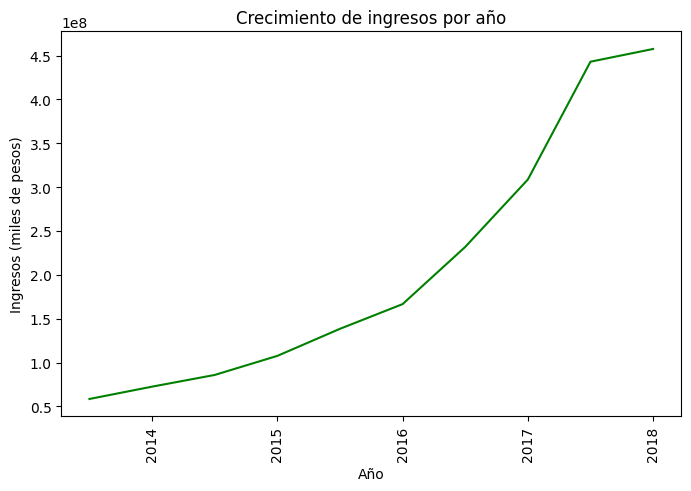

In [96]:
# Gráfico de crecimiento de ingresos por año
x= Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado.index
y= Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado['Ingresos (miles de pesos)']

fig,ax=plt.subplots(figsize=(8,5))
ax.set_xlabel('Año')
ax.set_ylabel('Ingresos (miles de pesos)')
ax.set_title('Crecimiento de ingresos por año')
ax.set_xticklabels(Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado.index,rotation=90)
ax.plot(x,y,color="g")

# KPI's

KPI 1: Aumentar en un 2% el acceso al servicio de internet, para el próximo trimestre, cada 100 hogares

In [97]:
# Filtrado de datos a utilizar para el KPI propuesto
df_filtrado = Penetración_Internet_fijo_cada_100_hogares.loc[(Penetración_Internet_fijo_cada_100_hogares['Año'] == 2022)]

df_filtrado

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38
...,...,...,...,...
67,2022,1,Santa Cruz,43.34
68,2022,1,Santa Fe,77.30
69,2022,1,Santiago Del Estero,47.17
70,2022,1,Tierra Del Fuego,98.29


In [98]:
# Columna 'Objetivo Hogares' representa el objetivo de hogares a alcanzar para lograr el 2% de aumento
df_filtrado['Objetivo hogares'] = df_filtrado['Accesos por cada 100 hogares'] * 0.02

# Utiliza la función "round()" para redondear y astype(int)" para convertir a un número entero
df_filtrado['Objetivo hogares'] = df_filtrado['Objetivo hogares'].round().astype(int)

# Columna 'Total a alcanzar' representa el objetivo total de hogares
df_filtrado['Total a alcanzar'] = df_filtrado['Accesos por cada 100 hogares'] + df_filtrado['Objetivo hogares']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\823840118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Objetivo hogares'] = df_filtrado['Accesos por cada 100 hogares'] * 0.02
C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\823840118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Objetivo hogares'] = df_filtrado['Objetivo hogares'].round().astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\823840118.py:8: SettingWithCopyWarning: 
A value is trying to be se

In [99]:
# Chequeo de cambios realizados anteriormente
df_filtrado

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Objetivo hogares,Total a alcanzar
0,2022,3,Buenos Aires,78.11,2,80.11
1,2022,3,Capital Federal,122.28,2,124.28
2,2022,3,Catamarca,65.33,1,66.33
3,2022,3,Chaco,43.86,1,44.86
4,2022,3,Chubut,84.38,2,86.38
...,...,...,...,...,...,...
67,2022,1,Santa Cruz,43.34,1,44.34
68,2022,1,Santa Fe,77.30,2,79.30
69,2022,1,Santiago Del Estero,47.17,1,48.17
70,2022,1,Tierra Del Fuego,98.29,2,100.29


In [100]:
# Exportado a csv
df_filtrado.to_csv('KPI_1.csv')

KPI 2: Aumentar en un 10% la velocidad media de bajada, para el próximo trimestre, en todas las provincias

In [101]:
# Filtrado de datos a utilizar para el KPI propuesto
df_filtrado2 = Velocidad_media_de_bajada_de_Internet_fijo_por_provincia.loc[(Velocidad_media_de_bajada_de_Internet_fijo_por_provincia['Año'] == 2022)]

df_filtrado2

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16
...,...,...,...,...
67,2022,1,Santa Cruz,11
68,2022,1,Santa Fe,39
69,2022,1,Santiago Del Estero,14
70,2022,1,Tierra Del Fuego,11


In [102]:
# Columna 'Objetivo velocidad media de bajada' representa el objetivo de velocidad media de bajada a alcanzar para lograr el 10% de aumento
df_filtrado2['Objetivo velocidad media de bajada'] = df_filtrado2['Mbps (Media de bajada)'] * 0.10

# Utiliza la función "round()" para redondear y astype(int)" para convertir a un número entero
df_filtrado2['Objetivo velocidad media de bajada'] = df_filtrado2['Objetivo velocidad media de bajada'].round().astype(int)

# Columna 'Total a alcanzar' representa el objetivo total de velocidad media de bajada
df_filtrado2['Total a alcanzar'] = df_filtrado2['Mbps (Media de bajada)'] + df_filtrado2['Objetivo velocidad media de bajada']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\738959268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado2['Objetivo velocidad media de bajada'] = df_filtrado2['Mbps (Media de bajada)'] * 0.10
C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\738959268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado2['Objetivo velocidad media de bajada'] = df_filtrado2['Objetivo velocidad media de bajada'].round().astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_476\738959268.py:8:

In [103]:
df_filtrado2

,Año,Trimestre,Provincia,Mbps (Media de bajada),Objetivo velocidad media de bajada,Total a alcanzar
0,2022,3,Buenos Aires,70,7,77
1,2022,3,Capital Federal,101,10,111
2,2022,3,Catamarca,61,6,67
3,2022,3,Chaco,53,5,58
4,2022,3,Chubut,16,2,18
...,...,...,...,...,...,...
67,2022,1,Santa Cruz,11,1,12
68,2022,1,Santa Fe,39,4,43
69,2022,1,Santiago Del Estero,14,1,15
70,2022,1,Tierra Del Fuego,11,1,12


In [104]:
# Exportado a csv
df_filtrado2.to_csv('KPI_2.csv')

KPI 3: Aumentar en un 15% el acceso al servicio de internet por medio de fibra óptica, para el próximo trimestre, en las provincias de Formosa, La Rioja, San Luis, Santiago del Estero y Tierra del Fuego

In [105]:
# Filtrado de datos a utilizar para el KPI propuesto
df_filtrado3 = Acceso_a_Internet_fijo_por_tecnología_y_provincia_agrupado

df_filtrado3

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
Provincia,,,,,
Buenos Aires,40561026,64072849,15260042,2045824,1236939
Capital Federal,11742699,35195760,1378718,115443,629355
Catamarca,841978,134903,277369,29445,49670
Chaco,1729750,1457227,343593,123077,37080
Chubut,1632717,769308,91807,520109,287441
Corrientes,1822905,1481200,97100,99674,73372
Córdoba,10711013,12237764,2168773,799631,297984
Entre Ríos,3425188,2833674,301631,435086,228255
Formosa,736555,312010,58052,249358,40030


In [106]:
# Filtrado de datos a utilizar para el KPI propuesto
df_filtrado3 = df_filtrado3.loc[df_filtrado3.index.isin(['Formosa', 'La Rioja', 'San Luis', 'Santiago Del Estero', 'Tierra Del Fuego']),:]


# Eliminado de columnas que no son pertinentes para este análisis
df_filtrado3 = df_filtrado3.drop(['ADSL','Cablemodem','Wireless','Otros'],axis=1)

df_filtrado3

,Fibra óptica
Provincia,
Formosa,58052
La Rioja,77099
San Luis,8884
Santiago Del Estero,32081
Tierra Del Fuego,19179


In [107]:
# Columna 'Objetivo acceso por fibra óptica' representa el objetivo de acceso a internet por fibra óptica a alcanzar para lograr el 15% de aumento
df_filtrado3['Objetivo acceso por fibra óptica'] = df_filtrado3['Fibra óptica'] * 0.15

# Utiliza la función "round()" para redondear y astype(int)" para convertir a un número entero
df_filtrado3['Objetivo acceso por fibra óptica'] = df_filtrado3['Objetivo acceso por fibra óptica'].round().astype(int)

# Columna 'Total a alcanzar' representa el objetivo total de acceso a internet por fibra óptica
df_filtrado3['Total a alcanzar'] = df_filtrado3['Fibra óptica'] + df_filtrado3['Objetivo acceso por fibra óptica']

df_filtrado3

,Fibra óptica,Objetivo acceso por fibra óptica,Total a alcanzar
Provincia,,,
Formosa,58052,8708,66760
La Rioja,77099,11565,88664
San Luis,8884,1333,10217
Santiago Del Estero,32081,4812,36893
Tierra Del Fuego,19179,2877,22056


In [108]:
# Exportado a csv
df_filtrado3.to_csv('KPI_3.csv')

KPI 4: Aumentar en un 20% los ingresos trimestrales por la prestación del servicio de internet fijo

In [109]:
#Filtrado de datos a utilizar para el KPI propuesto
df_filtrado4 = Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado

Ingresos_trimestrales_por_la_prestación_del_servicio_de_Internet_fijo_agrupado

,Ingresos (miles de pesos)
Año,
2014,13683949
2015,20108814
2016,26867508
2017,39671973
2018,59539594
2019,86772531
2020,127585840
2021,163383869
2022,182981651


In [110]:
# Columna 'Objetivo ingresos próximo trimestre' representa el objetivo de ingresos a alcanzar para lograr el 20% de aumento
df_filtrado4['Objetivo ingresos próximo trimestre'] = df_filtrado4['Ingresos (miles de pesos)'] * 0.20

# Utiliza la función "round()" para redondear y astype(int)" para convertir a un número entero
df_filtrado4['Objetivo ingresos próximo trimestre'] = df_filtrado4['Objetivo ingresos próximo trimestre'].round().astype(int)

# Columna 'Total a alcanzar' representa el objetivo total de ingresos para el próximo trimestre
df_filtrado4['Total a alcanzar'] = df_filtrado4['Ingresos (miles de pesos)'] + df_filtrado4['Objetivo ingresos próximo trimestre']

In [111]:
df_filtrado4

,Ingresos (miles de pesos),Objetivo ingresos próximo trimestre,Total a alcanzar
Año,,,
2014,13683949,2736790,16420739
2015,20108814,4021763,24130577
2016,26867508,5373502,32241010
2017,39671973,7934395,47606368
2018,59539594,11907919,71447513
2019,86772531,17354506,104127037
2020,127585840,25517168,153103008
2021,163383869,32676774,196060643
2022,182981651,36596330,219577981


In [112]:
# Exportado a csv
df_filtrado4.to_csv('KPI_4.csv')

In [113]:
# Filtrado de datos complementarios
df_filtrado5 = Ingresos_trimestrales_por_la_prestación_del_servicio_de_telefonía_móvil_agrupado

df_filtrado5

,Ingresos (miles de pesos)
Año,
2013,58560546
2014,72607710
2015,85950000
2016,107676433
2017,138536546
2018,166694340
2019,231880240
2020,308729960
2021,443035884


In [114]:
# Columna 'Objetivo ingresos próximo trimestre' representa el objetivo de ingresos a alcanzar para lograr el 20% de aumento
df_filtrado5['Objetivo ingresos próximo trimestre'] = df_filtrado5['Ingresos (miles de pesos)'] * 0.20

# Utiliza la función "round()" para redondear y astype(int)" para convertir a un número entero
df_filtrado5['Objetivo ingresos próximo trimestre'] = df_filtrado5['Objetivo ingresos próximo trimestre'].round().astype(int)

# Columna 'Total a alcanzar' representa el objetivo total de ingresos para el próximo trimestre
df_filtrado5['Total a alcanzar'] = df_filtrado5['Ingresos (miles de pesos)'] + df_filtrado5['Objetivo ingresos próximo trimestre']

In [115]:
df_filtrado5

,Ingresos (miles de pesos),Objetivo ingresos próximo trimestre,Total a alcanzar
Año,,,
2013,58560546,11712109,70272655
2014,72607710,14521542,87129252
2015,85950000,17190000,103140000
2016,107676433,21535287,129211720
2017,138536546,27707309,166243855
2018,166694340,33338868,200033208
2019,231880240,46376048,278256288
2020,308729960,61745992,370475952
2021,443035884,88607177,531643061


In [116]:
# Exportado a csv
df_filtrado5.to_csv('KPI_4_Complementario_.csv')